<a href="https://www.kaggle.com/code/klyushnik/blend-ensemble-machine-learning?scriptVersionId=180411660" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e5/sample_submission.csv
/kaggle/input/playground-series-s4e5/train.csv
/kaggle/input/playground-series-s4e5/test.csv


In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
%matplotlib inline

# Keras model - https://www.kaggle.com/code/klyushnik/keras-model

# **flood risks are rising**

**The first thing recent floods tell us is that the climate is changing.**

**In the past, it might have made sense to consider a flood a rare and random event – communities could just build back. But the statistical distribution of weather events and natural disasters is shifting.**
**What might have been a 1-in-500-years event may become a 1-in-100-years event, on the way to becoming a 1-in-50-years event. When Hurricane Harvey hit Texas in 2017, it delivered Houston’s third 500-year flood in the span of three years.**
**Basic physics points to the rising risks: Global greenhouse gas emissions are increasing global average temperatures. Warming leads to increasing precipitation and more intense downpours, and increased flood potential, particularly when storms hit on already saturated ground.**

![230907160458-05-greece-floods-rescue-operations.jpg?c=16x9&q=h_833,w_1480,c_fill](https://media.cnn.com/api/v1/images/stellar/prod/230907160458-05-greece-floods-rescue-operations.jpg?c=16x9&q=h_833,w_1480,c_fill)

**Your Goal: The goal of this competition is to predict the probability of a region flooding based on various factors.**

**Submissions are evaluated using the R2 score.**

![images?q=tbn:ANd9GcTKRMJwPCwtCcBb3cyCrNYUtthgwQRRbvmlmOLzotzA&s](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTKRMJwPCwtCcBb3cyCrNYUtthgwQRRbvmlmOLzotzA&s)

# load data, make inform

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv')

print('Shape train is', train.shape, 'shape test is', test.shape)

Shape train is (1117957, 22) shape test is (745305, 21)


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,1117957.0,558978.000000,322726.531784,0.000,279489.00,558978.000,838467.00,1117956.000
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000


In [6]:
train = train.drop(columns = ['id'])
test = test.drop(columns = ['id'])

print('Shape train is', train.shape, 'shape test is', test.shape)

Shape train is (1117957, 21) shape test is (745305, 20)


# Plot our data

![0_71_1079_647/master/1079.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=d4416919ec0a7c23b2a0b508798e84c6](https://i.guim.co.uk/img/media/34de2008c93bf413c22ec79c71bde29d92d1499e/0_71_1079_647/master/1079.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=d4416919ec0a7c23b2a0b508798e84c6)

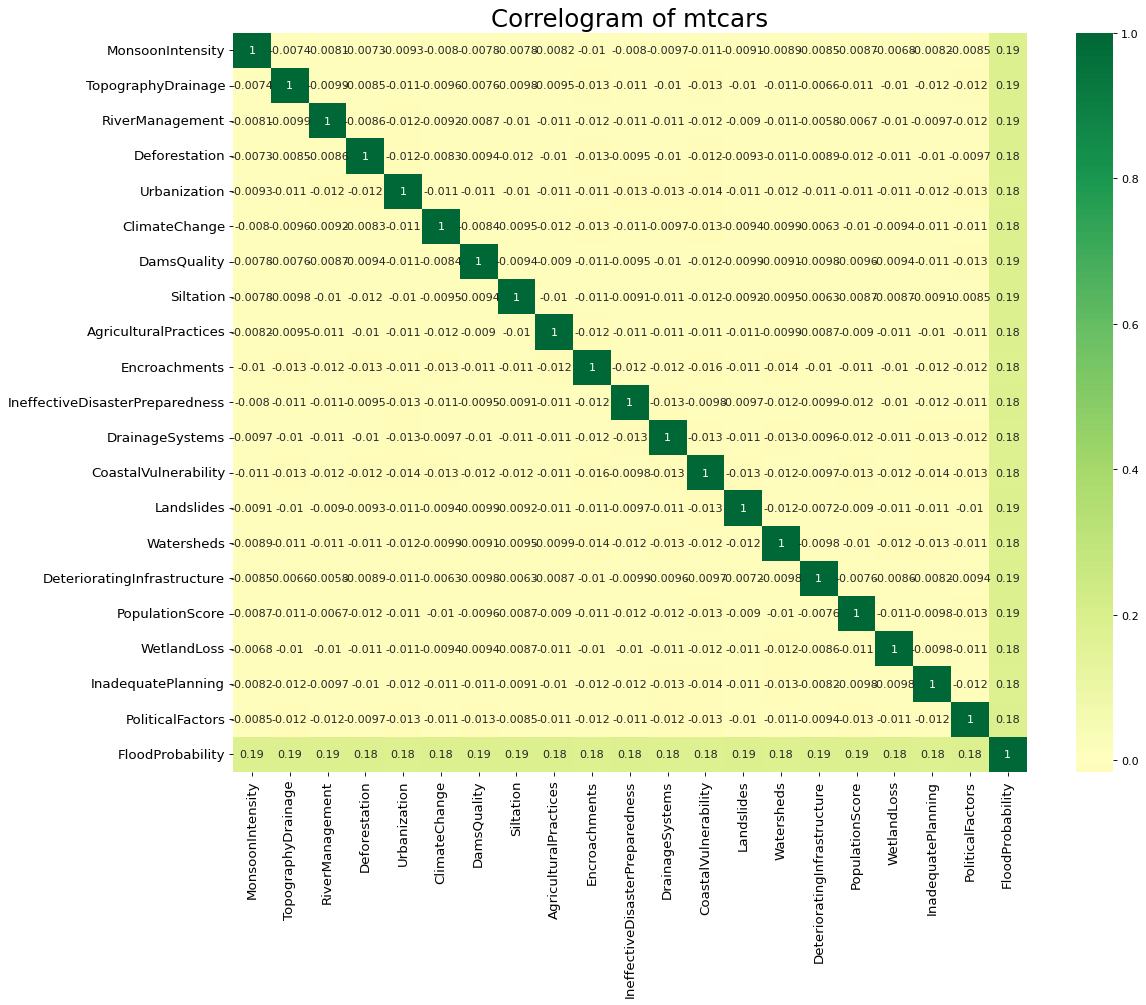

In [7]:
df = train.select_dtypes(include=[np.number])

plt.figure(figsize=(16,12), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [8]:
!pip install featexp

                                      Plots for MonsoonIntensity                                      


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


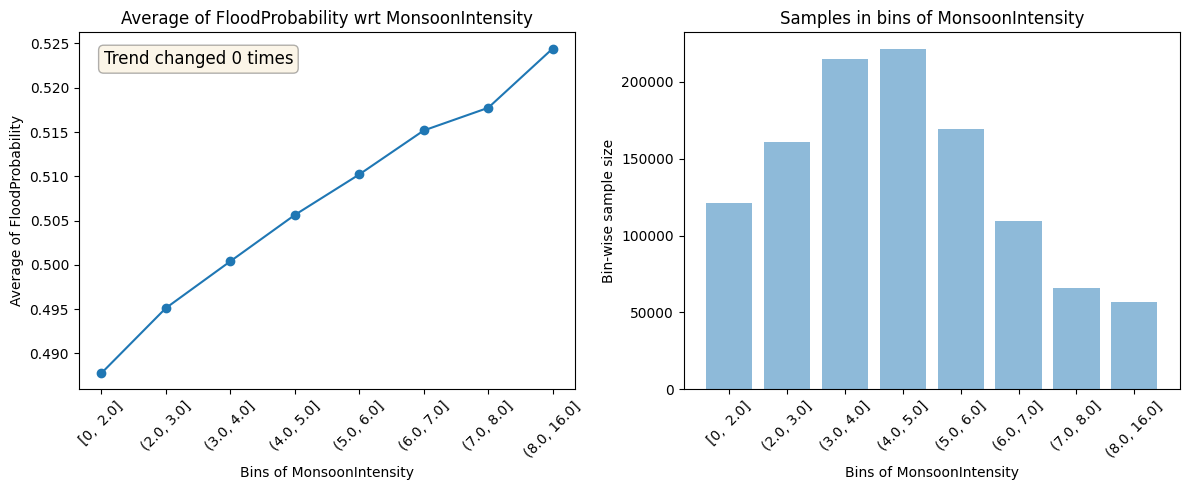

--------------------------------------------------------------------------------------------------------------


                                     Plots for TopographyDrainage                                     


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


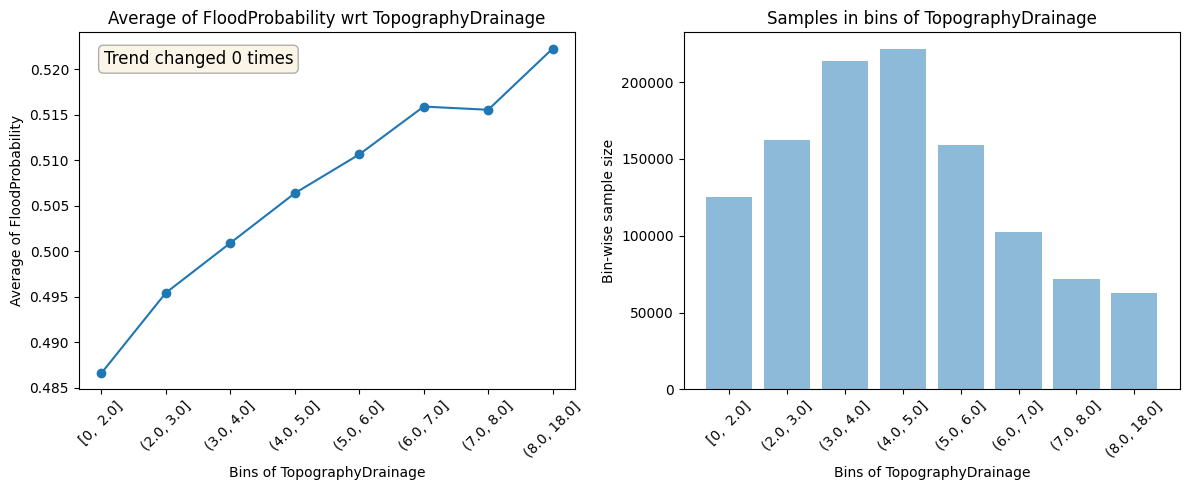

--------------------------------------------------------------------------------------------------------------


                                      Plots for RiverManagement                                       


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


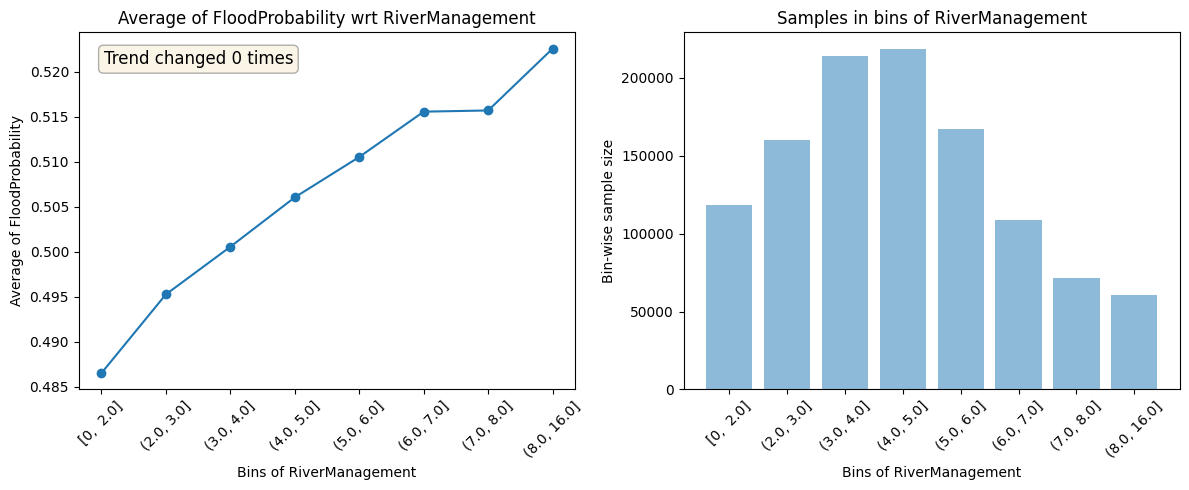

--------------------------------------------------------------------------------------------------------------


                                       Plots for Deforestation                                        


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


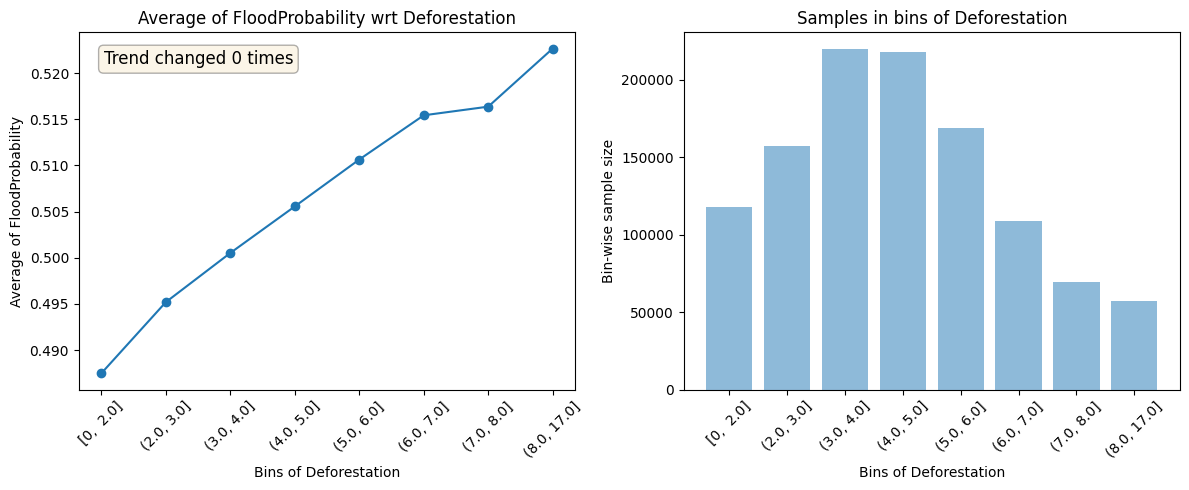

--------------------------------------------------------------------------------------------------------------


                                        Plots for Urbanization                                        


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


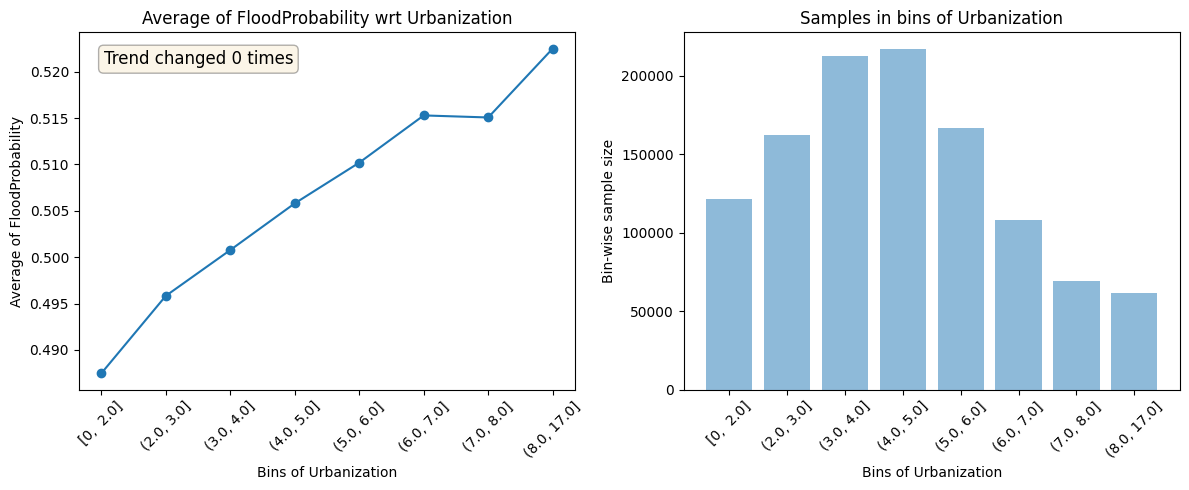

--------------------------------------------------------------------------------------------------------------


                                       Plots for ClimateChange                                        


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


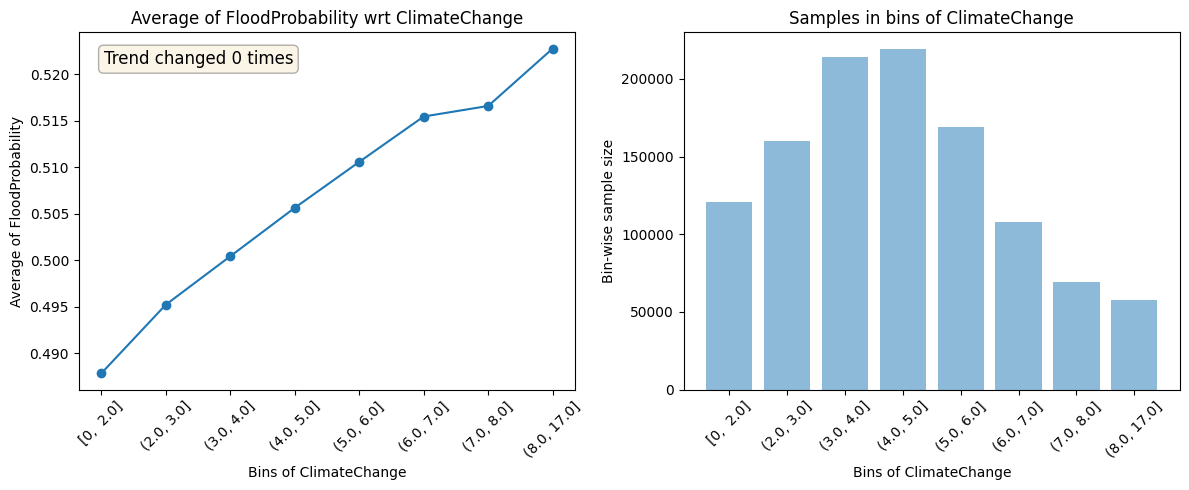

--------------------------------------------------------------------------------------------------------------


                                        Plots for DamsQuality                                         


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


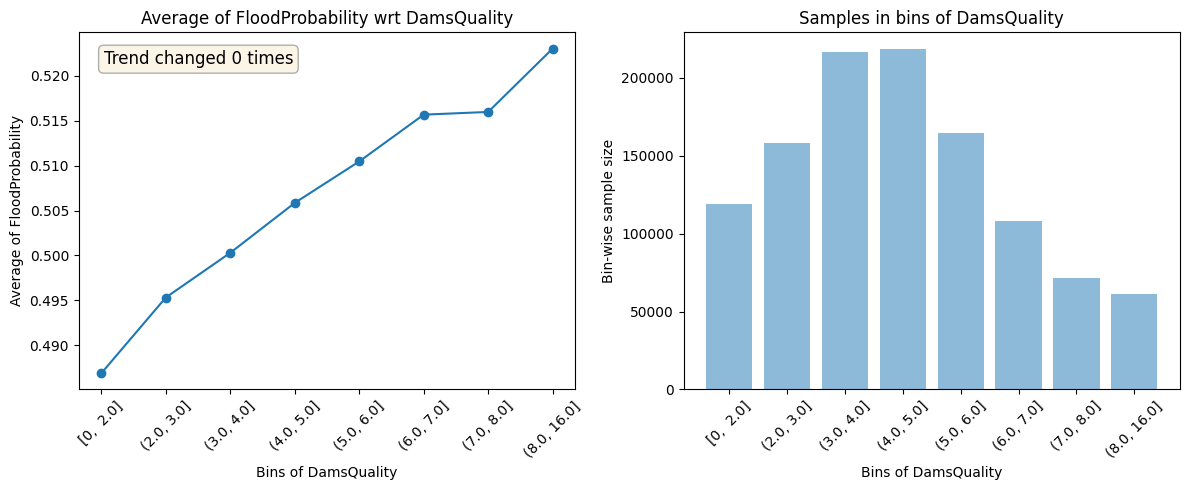

--------------------------------------------------------------------------------------------------------------


                                         Plots for Siltation                                          


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


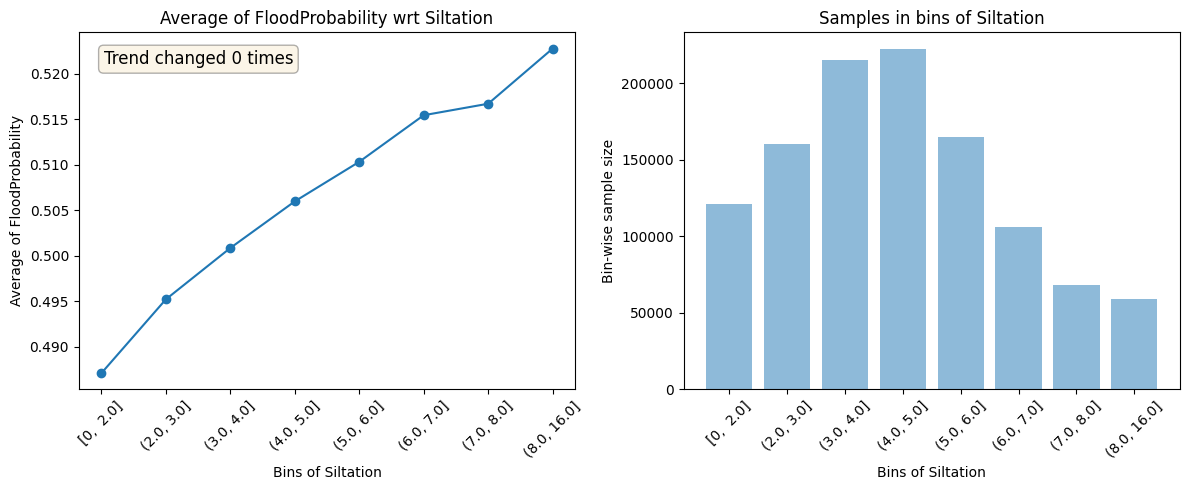

--------------------------------------------------------------------------------------------------------------


                                   Plots for AgriculturalPractices                                    


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


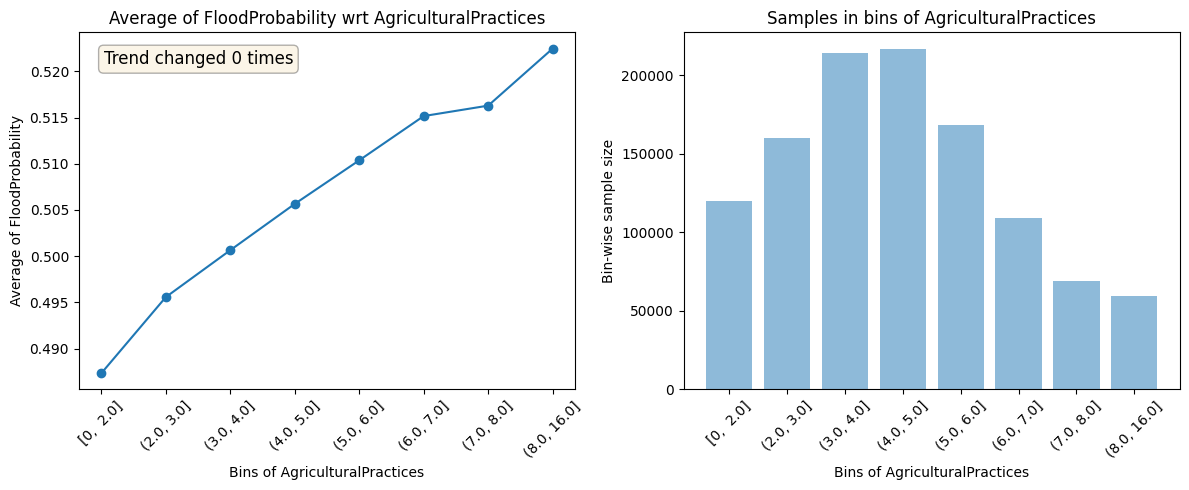

--------------------------------------------------------------------------------------------------------------


                                       Plots for Encroachments                                        


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


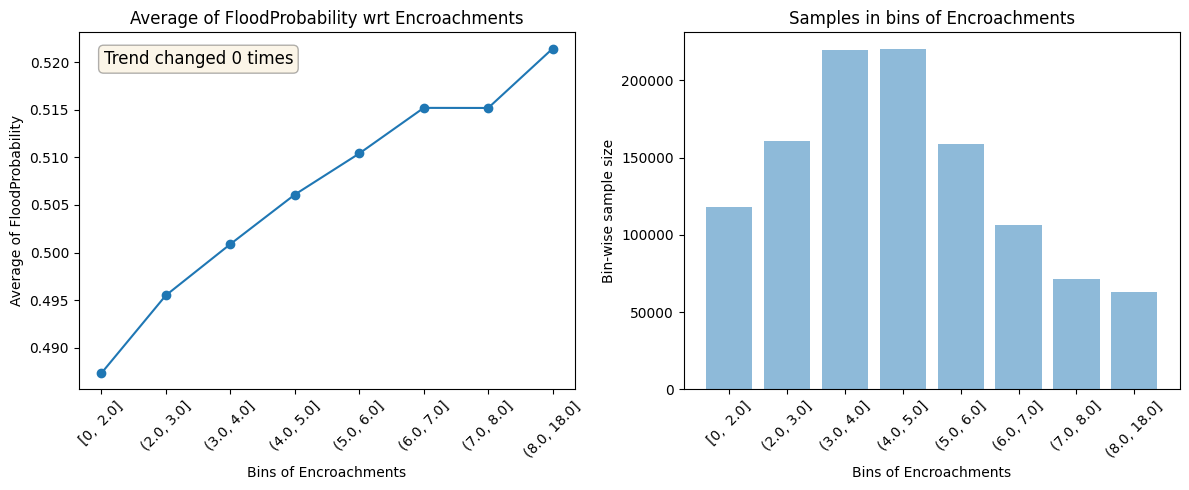

--------------------------------------------------------------------------------------------------------------


                              Plots for IneffectiveDisasterPreparedness                               


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


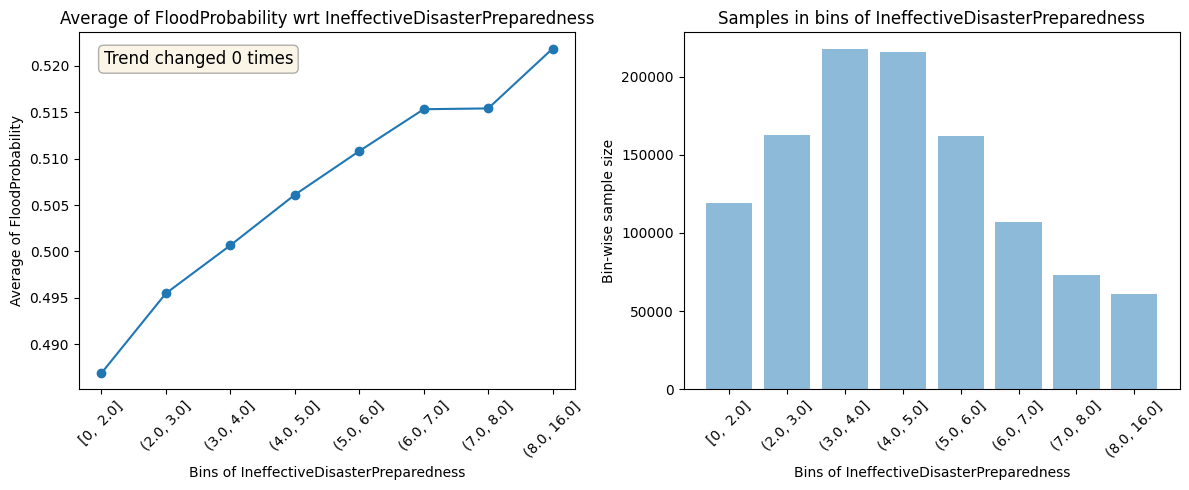

--------------------------------------------------------------------------------------------------------------


                                      Plots for DrainageSystems                                       


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


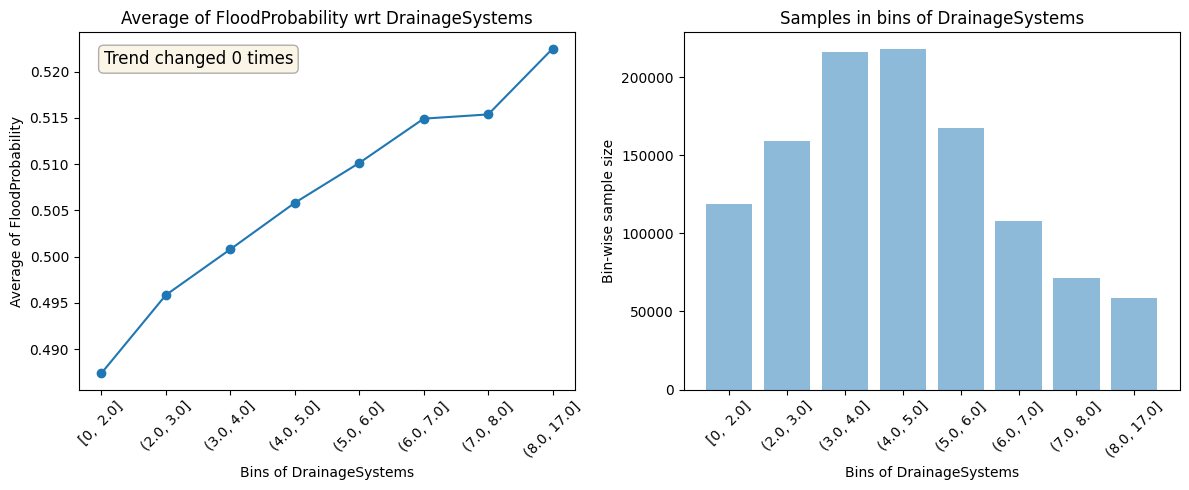

--------------------------------------------------------------------------------------------------------------


                                    Plots for CoastalVulnerability                                    


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


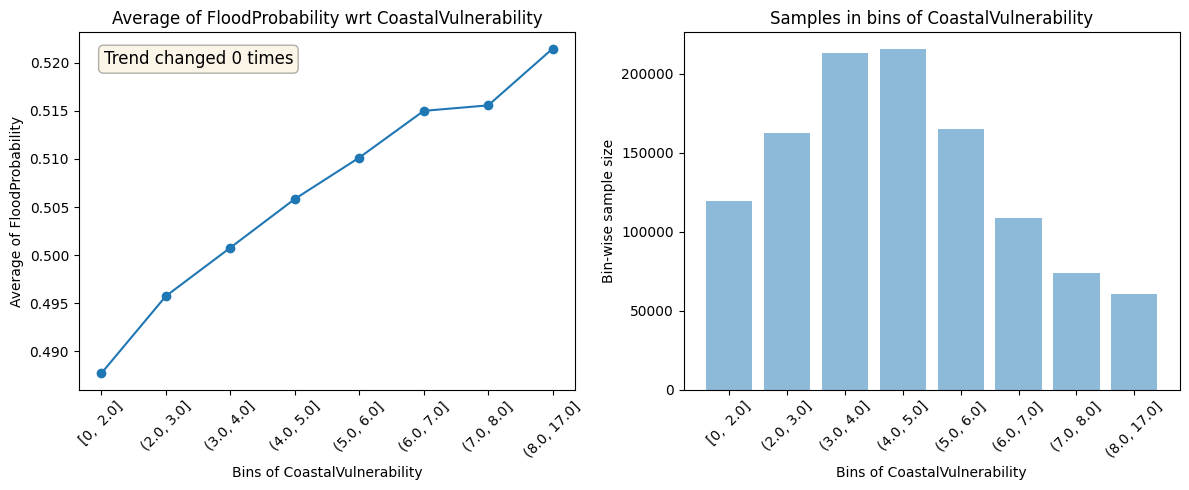

--------------------------------------------------------------------------------------------------------------


                                         Plots for Landslides                                         


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


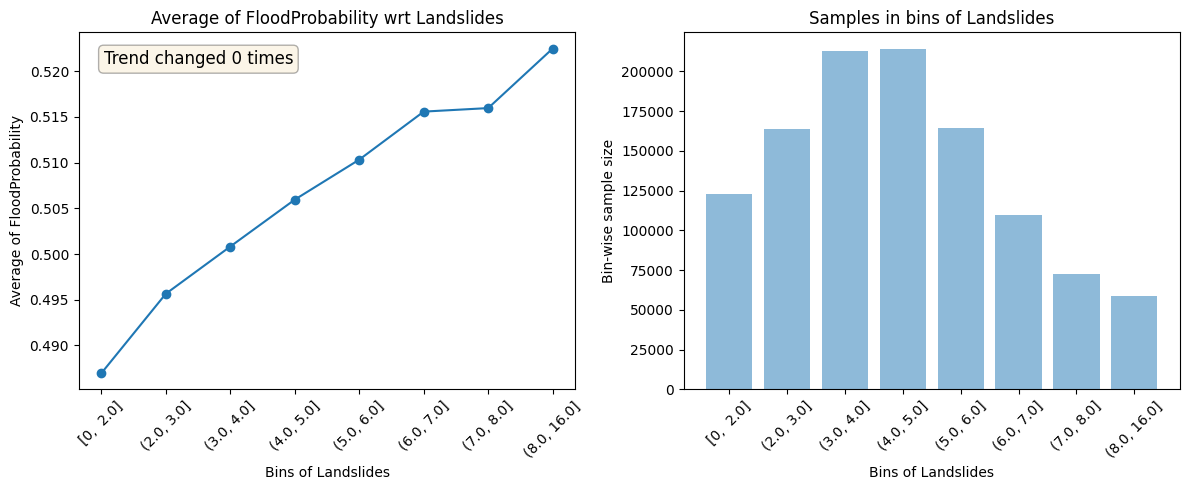

--------------------------------------------------------------------------------------------------------------


                                         Plots for Watersheds                                         


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


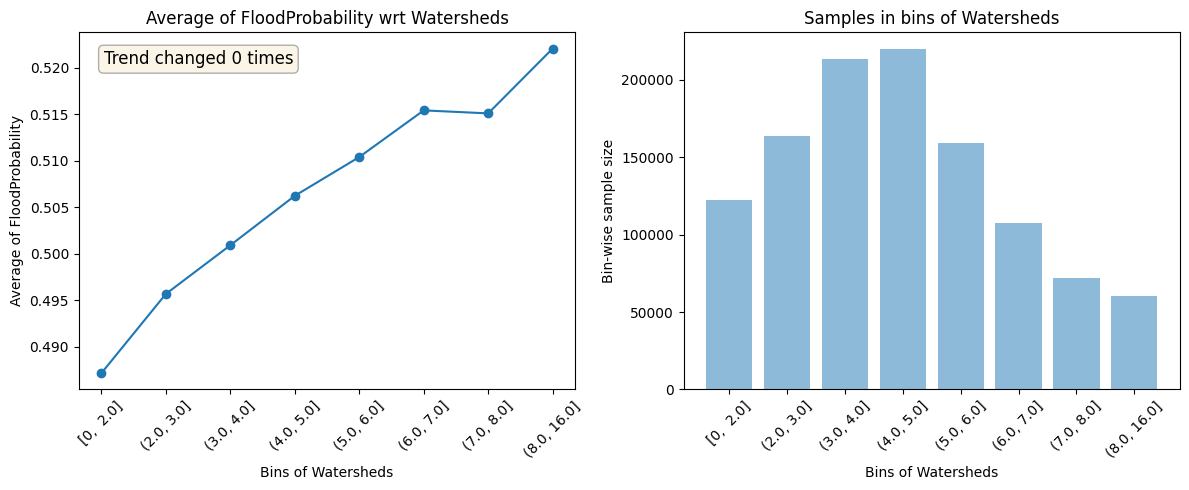

--------------------------------------------------------------------------------------------------------------


                                Plots for DeterioratingInfrastructure                                 


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


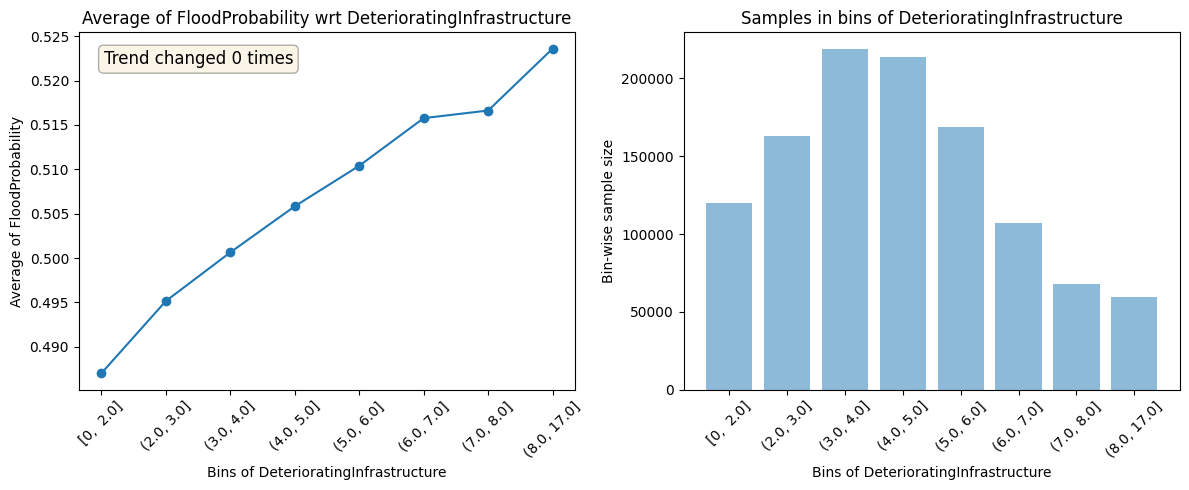

--------------------------------------------------------------------------------------------------------------


                                      Plots for PopulationScore                                       


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


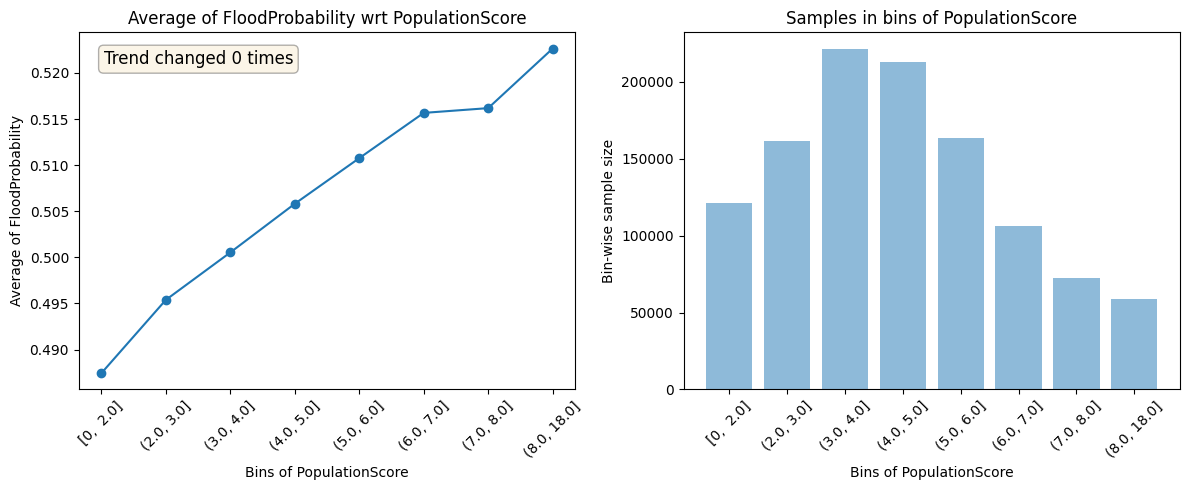

--------------------------------------------------------------------------------------------------------------


                                        Plots for WetlandLoss                                         


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


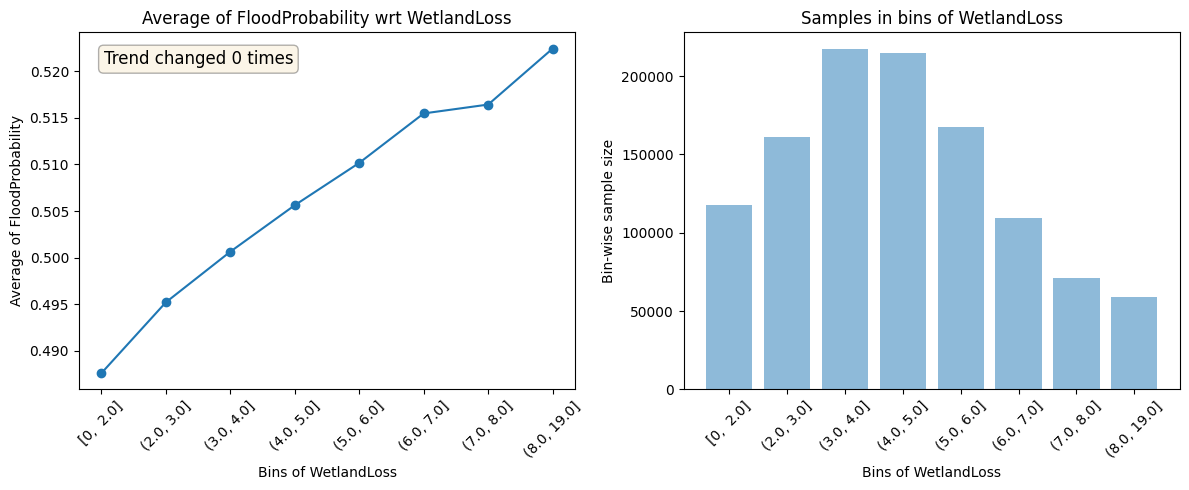

--------------------------------------------------------------------------------------------------------------


                                     Plots for InadequatePlanning                                     


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


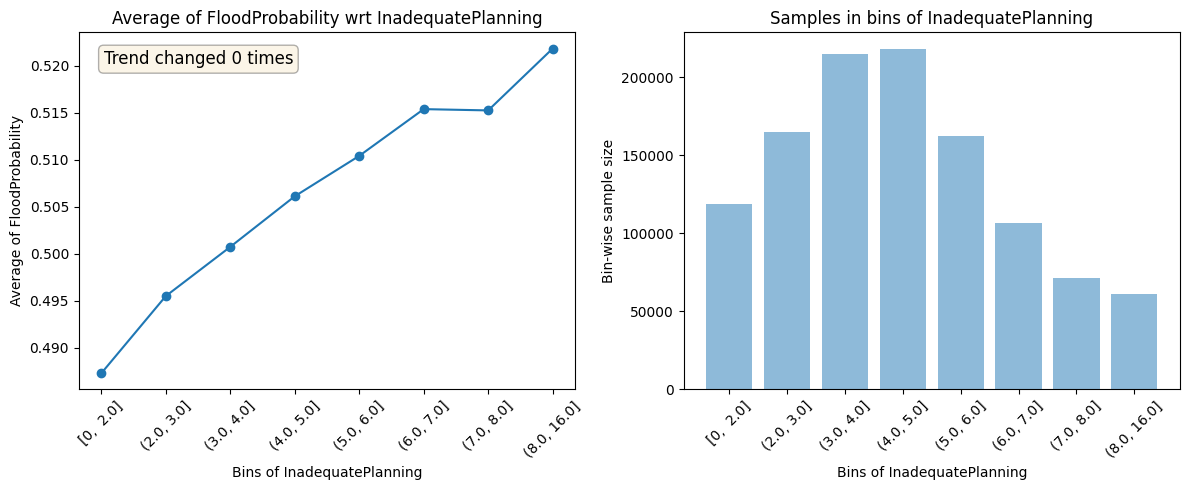

--------------------------------------------------------------------------------------------------------------


                                      Plots for PoliticalFactors                                      


/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = input_data.groupby([cut_series], as_index=True).agg(
/opt/conda/lib/python3.10/site-packages/featexp/base.py:55: FutureWarning: The provided callable <function mean at 0x7ced442184c0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped = input_data.groupby([cut_series], as_index=True).agg(


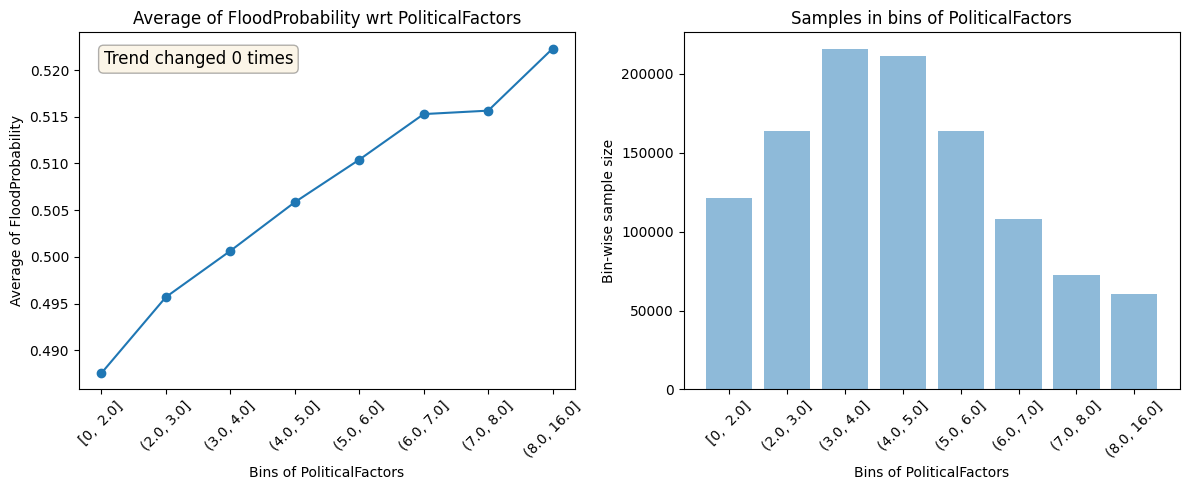

--------------------------------------------------------------------------------------------------------------




In [9]:
from featexp import get_univariate_plots

get_univariate_plots(data=train, target_col='FloodProbability', 
                     features_list=['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
                                   'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
                                   'Siltation', 'AgriculturalPractices', 'Encroachments',
                                   'IneffectiveDisasterPreparedness', 'DrainageSystems',
                                   'CoastalVulnerability', 'Landslides', 'Watersheds',
                                   'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
                                   'InadequatePlanning', 'PoliticalFactors'], bins=10)

In [10]:
X = train.drop(columns = ['FloodProbability'],axis =1)

y = train['FloodProbability']
X_total = test

print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X = X.astype ('int32')
X_total = X_total.astype('int32')

X_df = X.copy()
X_df_test = X_total.copy()

X shape :(1117957, 20) , y shape :(1117957,), X_total shape :(745305, 20)


# add new data

![621ff31e3f8b7b1c6151a064/None/960x0.png?format=png&width=960](https://imageio.forbes.com/specials-images/imageserve/621ff31e3f8b7b1c6151a064/None/960x0.png?format=png&width=960)

In [11]:
from sklearn.base import BaseEstimator, TransformerMixin

class AggFeatureExtractor(BaseEstimator, TransformerMixin):
    
    def __init__(self, group_col, agg_col, agg_func):
        self.group_col = group_col
        self.group_col_name = ''
        for col in group_col:
            self.group_col_name += col
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.agg_df = None
        self.medians = None
        
    def fit(self, X, y=None):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        
        self.agg_df = X.groupby(group_col)[agg_col].agg(agg_func)
        self.agg_df.columns = [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]
        self.medians = X[agg_col].median()
        
        return self
    
    def transform(self, X):
        group_col = self.group_col
        agg_col = self.agg_col
        agg_func = self.agg_func
        agg_df = self.agg_df
        medians = self.medians
        
        X_merged = pd.merge(X, agg_df, left_on=group_col, right_index=True, how='left')
        X_merged.fillna(medians, inplace=True)
        X_agg = X_merged.loc[:, [f'{self.group_col_name}_{agg}_{_agg_col}' for _agg_col in agg_col for agg in agg_func]]
        
        return X_agg
    
    def fit_transform(self, X, y=None):
        self.fit(X, y)
        X_agg = self.transform(X)
        return X_agg

In [12]:
class Preprocessor:
    def __init__(self, agg_col, agg_func, group_cols):
        self.agg_col = agg_col
        self.agg_func = agg_func
        self.group_cols = group_cols
        
    def preprocess(self, X, X_total):    
        agg_train, agg_test = [], []
        for group_col in self.group_cols:
            agg_extractor = AggFeatureExtractor(group_col=group_col, agg_col=self.agg_col, agg_func=self.agg_func)
            agg_extractor.fit(pd.concat([X, X_total], axis=0))
            agg_train.append(agg_extractor.transform(X))
            agg_test.append(agg_extractor.transform(X_total))
        X = pd.concat([X] + agg_train, axis=1)
        X_total = pd.concat([X_total] + agg_test, axis=1)
        
        X = X.fillna(0)
        X_total = X_total.fillna(0)
        return X, X_total

In [13]:
list_of_choice = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

In [14]:
agg_col = list_of_choice

agg_func = ['mean', 'std', 'median']

group_cols = [
  ['MonsoonIntensity', 'TopographyDrainage'],
  [ 'RiverManagement', 'Deforestation'],
  ['AgriculturalPractices', 'Encroachments'],
  ['IneffectiveDisasterPreparedness', 'DrainageSystems'],
  ['CoastalVulnerability', 'Landslides'],              
  ['Watersheds', 'DeterioratingInfrastructure'],
  ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement'],
  ['CoastalVulnerability', 'Landslides', 'Watersheds'],
  ['DeterioratingInfrastructure','PopulationScore', 'WetlandLoss'],
  ['Urbanization', 'ClimateChange', 'Watersheds'], 
  ['MonsoonIntensity', 'DrainageSystems','PoliticalFactors']
             ]

pp = Preprocessor(agg_col, agg_func, group_cols)
X, X_total = pp.preprocess(X, X_total)

print(f"X shape :{X.shape} , y shape :{y.shape}, X_test shape :{X_total.shape}")

X shape :(1117957, 680) , y shape :(1117957,), X_test shape :(745305, 680)


# threshold

In [15]:
from sklearn.feature_selection import VarianceThreshold

def variance_threshold(df,th):
    var_thres=VarianceThreshold(threshold=th)
    var_thres.fit(df)
    new_cols = var_thres.get_support()
    return df.iloc[:,new_cols]

In [16]:
X = variance_threshold(X,0.4)
list_name = (X.columns)
X_total = X_total[list_name]

print(f"X shape :{X.shape} , y shape :{y.shape}, X_total shape :{X_total.shape}")

X shape :(1117957, 74) , y shape :(1117957,), X_total shape :(745305, 74)


# principal component analysis (PCA)

![stats-PCA-example.png](https://knowledge.dataiku.com/latest/_images/stats-PCA-example.png)

In [17]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
principalComponents = pca.fit_transform(X)
principalComponents_test = pca.fit_transform(X_total)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1'])
principalDftest = pd.DataFrame(data = principalComponents_test
             , columns = ['principal component 1'])

X_df['principal component_1'] = principalDf
X_df_test['principal component_1'] = principalDftest
print(f"X shape :{X_df.shape} , y shape :{y.shape}, X_test shape :{X_df_test.shape}")

X shape :(1117957, 21) , y shape :(1117957,), X_test shape :(745305, 21)


In [18]:
X = X_df
X_total = X_df_test
print(f"X shape :{X.shape} , y shape :{y.shape}, X_test shape :{X_total.shape}")

X shape :(1117957, 21) , y shape :(1117957,), X_test shape :(745305, 21)


In [19]:
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import HistGradientBoostingRegressor,RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.model_selection import KFold
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR

# Stacking Ensemble Machine Learning

In [20]:
FOLDs = KFold(n_splits=15, shuffle=True,random_state=42)

oof_cat = np.zeros(len(X))
predictions_cat = np.zeros(len(X_total))
oof_xgb = np.zeros(len(X))
predictions_xgb = np.zeros(len(X_total))
oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(X_total))
oof_hgb = np.zeros(len(X))
predictions_hgb = np.zeros(len(X_total))
oof_gbr = np.zeros(len(X))
predictions_gbr = np.zeros(len(X_total))
oof_rf = np.zeros(len(X))
predictions_rf = np.zeros(len(X_total))
oof_vote = np.zeros(len(X))
predictions_vote = np.zeros(len(X_total))

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X,y)):
    X.iloc[trn_idx], y.iloc[trn_idx]
    X.iloc[val_idx], y.iloc[val_idx]

############################################################################
    cat_model = CatBoostRegressor(verbose = 0)
    cat_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_cat[val_idx] = cat_model.predict(X.iloc[val_idx])
    predictions_cat += cat_model.predict(X_total) / FOLDs.n_splits
    cat_score = r2_score(oof_cat, y)

    print('Fold', fold_, '-- CatBoostRegressor oof r2_score is ---',cat_score)
############################################################################
    xgb_model = xgb.XGBRegressor(learning_rate = 0.05)
                               
    xgb_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_xgb[val_idx] = xgb_model.predict(X.iloc[val_idx])
    predictions_xgb += xgb_model.predict(X_total)/ FOLDs.n_splits
    xgb_score = r2_score(oof_xgb, y)

    print('Fold', fold_, '-- XGBRegressor oof r2_score is ---',xgb_score)
############################################################################
    lgb_model = LGBMRegressor(verbose = -1)
    lgb_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_lgb[val_idx] = lgb_model.predict(X.iloc[val_idx])
    predictions_lgb += lgb_model.predict(X_total) / FOLDs.n_splits
    lgb_score = r2_score(oof_lgb, y)
    
    print('Fold', fold_, '-- LGBMRegressor oof r2_score is ---', lgb_score)
############################################################################
    hgb_model = HistGradientBoostingRegressor(learning_rate = 0.09,
                                               max_iter = 30)
    hgb_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_hgb[val_idx] = hgb_model.predict(X.iloc[val_idx])
    predictions_hgb += hgb_model.predict(X_total) / FOLDs.n_splits
    hgb_score = r2_score(oof_hgb, y)
    
    print('Fold', fold_, '-- HistGradientBoostingRegressor oof r2_score is ---', hgb_score)
############################################################################
    gbr_model = GradientBoostingRegressor(learning_rate = 0.05,
                                           n_estimators = 30)
    gbr_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_gbr[val_idx] = gbr_model.predict(X.iloc[val_idx])
    predictions_gbr += gbr_model.predict(X_total) / FOLDs.n_splits
    gbr_score = r2_score(oof_gbr, y)

    print('Fold', fold_, '-- GradientBoostingRegressor oof r2_score is ---', gbr_score)
############################################################################
    rf_model = RandomForestRegressor(n_estimators = 30,
                                       max_depth = 4)
    rf_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_rf[val_idx] = rf_model.predict(X.iloc[val_idx])
    predictions_rf += rf_model.predict(X_total) / FOLDs.n_splits
    rf_score = r2_score(oof_rf, y)

    print('Fold', fold_, '-- RandomForestRegressor oof r2_score is ---', rf_score)
############################################################################
    vote_model = VotingRegressor(estimators=[('cat', cat_model), ('xgb', xgb_model), ('lgb', lgb_model)])
    vote_model.fit(X.iloc[trn_idx],y.iloc[trn_idx])
    oof_vote[val_idx] = vote_model.predict(X.iloc[val_idx])
    predictions_vote += vote_model.predict(X_total) / FOLDs.n_splits
    vote_score = r2_score(oof_vote, y)

    print('Fold', fold_, '-- VotingRegressor oof r2_score is ---', vote_score)

Fold 0 -- CatBoostRegressor oof r2_score is --- -14.022426430098813
Fold 0 -- XGBRegressor oof r2_score is --- -14.123408934828426
Fold 0 -- LGBMRegressor oof r2_score is --- -14.083321775216893
Fold 0 -- HistGradientBoostingRegressor oof r2_score is --- -14.148669178124504
Fold 0 -- GradientBoostingRegressor oof r2_score is --- -14.16114516213904
Fold 0 -- RandomForestRegressor oof r2_score is --- -14.155129460635317
Fold 0 -- VotingRegressor oof r2_score is --- -14.082642655822948
Fold 1 -- CatBoostRegressor oof r2_score is --- -6.506218679915433
Fold 1 -- XGBRegressor oof r2_score is --- -6.560465851938178
Fold 1 -- LGBMRegressor oof r2_score is --- -6.538285338214637
Fold 1 -- HistGradientBoostingRegressor oof r2_score is --- -6.5744709845993325
Fold 1 -- GradientBoostingRegressor oof r2_score is --- -6.585202952875908
Fold 1 -- RandomForestRegressor oof r2_score is --- -6.583544662025377
Fold 1 -- VotingRegressor oof r2_score is --- -6.5380893293180105
Fold 2 -- CatBoostRegressor 

# blend prediction

In [21]:
train_df = pd.DataFrame({'1': oof_cat,
                         '2': oof_xgb,
                         '3': oof_lgb,
                         '4': oof_hgb,
                         '5': oof_gbr,
                         '6': oof_rf,
                         '7': oof_vote
                         })

test_df = pd.DataFrame({'1': predictions_cat,  
                        '2': predictions_xgb, 
                        '3': predictions_lgb, 
                        '4': predictions_hgb,
                        '5': predictions_gbr,
                        '6': predictions_rf,
                        '7': predictions_vote
                        })

In [22]:
for i in train_df.columns:
    train_df[i+' +log1'] = (train_df[i]+1).transform(np.log1p)
    test_df[i+' +log1'] =(test_df[i]+1).transform(np.log1p)
    train_df[i+' +log'] = (train_df[i]+1).transform(np.log)
    test_df[i+' +log'] =(test_df[i]+1).transform(np.log)

FOLDs = KFold(n_splits=15, shuffle=True,random_state=42)

oof_blend = np.zeros(len(train_df))
predictions = np.zeros(len(test_df))
for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(train_df,y)):
    train_df.iloc[trn_idx], y.iloc[trn_idx]
    train_df.iloc[val_idx], y.iloc[val_idx]

    blend =  CatBoostRegressor(verbose = 0)
    blend.fit(train_df.iloc[trn_idx],y.iloc[trn_idx])
    
    oof_blend[val_idx] = blend.predict(train_df.iloc[val_idx])
    predictions += blend.predict(test_df)/FOLDs.n_splits
    blend_score = r2_score(oof_blend, y)
    
    print('Fold', fold_, '-- Blend oof r2_score is ---',blend_score)

Fold 0 -- Blend oof r2_score is --- -14.017901674745868
Fold 1 -- Blend oof r2_score is --- -6.504439704152602
Fold 2 -- Blend oof r2_score is --- -3.998218372495649
Fold 3 -- Blend oof r2_score is --- -2.7457820953951084
Fold 4 -- Blend oof r2_score is --- -1.9941983107160577
Fold 5 -- Blend oof r2_score is --- -1.4923344384193817
Fold 6 -- Blend oof r2_score is --- -1.1324494797394444
Fold 7 -- Blend oof r2_score is --- -0.8622564792850915
Fold 8 -- Blend oof r2_score is --- -0.6508648145069984
Fold 9 -- Blend oof r2_score is --- -0.4803730289927526
Fold 10 -- Blend oof r2_score is --- -0.3382146791415459
Fold 11 -- Blend oof r2_score is --- -0.2162236934420163
Fold 12 -- Blend oof r2_score is --- -0.1028312049452551
Fold 13 -- Blend oof r2_score is --- 0.025600425050580355
Fold 14 -- Blend oof r2_score is --- 0.84269225952519


In [23]:
print("Blend: {:<8.5f}".format(r2_score(oof_blend, y)))

Blend: 0.84269 


# submit

In [24]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e5/sample_submission.csv')
sample['FloodProbability'] = predictions
sample.to_csv('submission.csv', index=False)

In [25]:
sample

,id,FloodProbability
0,1117957,0.577574
1,1117958,0.451703
2,1117959,0.451619
3,1117960,0.469305
4,1117961,0.470153
...,...,...
745300,1863257,0.476259
745301,1863258,0.443267
745302,1863259,0.619738
745303,1863260,0.548955
